

1.   Import Package
2.   Data Cleaning and processing
3.   Word Embedding (Word2Vec)
2.   Implemented LSTM
2.   Implement BiLSTM


In [ ]:
#install libraries
!pip install bnlp
!pip install bnlp_toolkit
!pip install --upgrade bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bnlp: filename=bnlp-0.8-py3-none-any.whl size=32825 sha256=3bf6fe476a7335c74a4ea17ba5147c0416047897e70623ec9bdab932606b9169
  Stored in directory: /root/.cache/pip/wheels/64/c7/7e/272284eb8c800fbb5306bdf7904ae9f99a64812fc615f471b2
Successfully built bnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 50.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=887782613ba0a576a00a26c4fe35a8f6718ad59a

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393368 sha256=a89b56a31bbbe50a52912c04e402307e61c04bb39a62cd868d0f05f465290af5
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import random
import re, string
import seaborn as sns
import matplotlib.pyplot as plt

from string import punctuation
from bnlp import BasicTokenizer
from bnlp import NLTKTokenizer
from bnlp import SentencepieceTokenizer
from bnlp.corpus import stopwords, punctuations, letters, digits
from bnlp.corpus.util import remove_stopwords
from bnlp import BengaliWord2Vec

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


#PyTorch LSTM
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

import gensim
from gensim.models import Word2Vec, FastText
import fasttext
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

<ipython-input-4-7d5d335e6a9c>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

## Define Performance Metrics & Confusion Matrix 

In [ ]:
# Calculate performance metrics
def perf_matrix(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  print('Accuracy:', accuracy)
  print('Precision:', precision)
  print('Recall:', recall)
  print('F1 Score:', f1)

# Plot confusion matrix
def conf_matrix(y_test, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", fmt='g', cbar=True, annot_kws={"size":20})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd drive/MyDrive/Colab Notebooks/Thesis Project/

/content/drive/MyDrive/Colab Notebooks/Thesis Project


In [ ]:
!ls


'0. Depression Analysis Dataset.xlsx'
'1. Depression Analysis Dataset Cleaned v1.xlsx'
'1. Depression Analysis Dataset Cleaned v2.xlsx'
'1. Depression Analysis Dataset Cleaned v3.xlsx'
'1. Depression Analysis v1.ipynb'
'2.1 Depression Analysis v2 (Previous code).ipynb'
'2.2 Depression Analysis v2.ipynb'
'2.3 Depression Analysis v2 modified.ipynb'
'3.1 Depression_Analysis_v3.ipynb'
'3.2 Depression_Analysis_v3 (FastText).ipynb'
'3.3 Depression_Analysis_v3 (Glove).ipynb'
'3.4 Depression_Analysis_LSTM_FastText.ipynb'
'3.5 Depression_Analysis_BiLSTM_FastText.ipynb'
'4. Depression_Analysis (Hyperparameter Tuning).ipynb'
 corpus.txt
'Depression_Analysis (Bayesian Optimization).ipynb'
 model_GRU.pth
 state_dict.pt


# Word Embedding (Fasttext)

In [ ]:
import fasttext
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data
df = pd.read_excel('1. Depression Analysis Dataset Cleaned v2.xlsx')
X = df['text']

# Create a vocabulary of words from the data
corpus = [word for text in X for word in text.split()]
count_words = Counter(corpus)
sorted_words = count_words.most_common()
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

# Save the text data to a file
with open('corpus.txt', 'w') as f:
    for text in X:
        f.write(text + '\n')

# Create a FastText model
model = fasttext.train_unsupervised('corpus.txt', model='skipgram', dim=200)

# Initialize the embedding matrix
VOCAB_SIZE = len(vocab_to_int) + 1 #+1 for the padding
EMBEDDING_DIM = model.get_dimension()
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

# Update the embedding matrix with the FastText embeddings
for word, i in vocab_to_int.items():
    embedding_matrix[i] = model.get_word_vector(word)

# Print the shape of the embedding matrix
print("Embedding Matrix Shape:", embedding_matrix.shape)

# Tokenize the data using the vocabulary
text_int = []
for text in X:
    r = [vocab_to_int[word] for word in text.split()]
    text_int.append(r)
    
# Add padding to tokens
MAX_LEN = 5000
X = pad_sequences(text_int, maxlen=MAX_LEN, padding='post')
y = df['label'].values

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)


Embedding Matrix Shape: (63367, 200)


# Data preprocessing for LSTM

In [ ]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [ ]:
max_len = 5000

In [ ]:
vocabulary, tokenized_column = Tokenize(df["text"], max_len)

In [ ]:
vocabulary[:20]

[('সাথে', 24522),
 ('না।', 18631),
 ('চাই', 14293),
 ('কথা', 11425),
 ('জানি', 11052),
 ('করেছি', 10807),
 ('সত্যিই', 9677),
 ('নিজেকে', 8401),
 ('করছি', 8398),
 ('সম্পর্কে', 8236),
 ('সময়', 8117),
 ('খারাপ', 7958),
 ('ভাল', 7829),
 ('অনুভব', 7206),
 ('শেষ', 6788),
 ('সাহায্য', 6154),
 ('জীবন', 6017),
 ('বোধ', 5876),
 ('বন্ধু', 5754),
 ('ছিলাম', 5544)]

In [ ]:
tokenized_column[3:6]

array([[    0,     0,     0, ...,   221,   325,     2],
       [    0,     0,     0, ...,    27,   377, 31353],
       [    0,     0,     0, ...,    23,   195,    91]])

In [ ]:
df["text"].iloc[10]

'প্রথমে আপনাকে প্রশ্ন উপস্থাপন যাচ্ছি পারবেন। দিয়েছি আপনাকে সরবরাহ চাই গুরুতর বিষণ্নতা নেই। ভালোবাসো জীবনে ব্যক্তি সম্পর্কে চিন্তা আপনাকে বিরক্ত শ্রদ্ধার সাথে অপছন্দ উপলব্ধি হৃদয় পছন্দগুলির নিয়ন্ত্রণ কেবলমাত্র আপনারই পদক্ষেপের নির্দেশ ক্ষমতা বিশ্বের বিলিয়ন মানুষ ব্যক্তি সম্পর্কে চিন্তা যুক্তিসঙ্গত সন্দেহের বাইরে প্রমাণ চিন্তা পয়সা মিলিয়ন ডলারের ভগ্নাংশ কারণেই হতাশাকে যুক্তিযুক্ত লোকেরা সম্পর্কে অভিশাপ লোক পারেননি বাঁচাতে অবাধে জীবন দেবে। সবাই এভাবে মানুষ আপনাকে একজনের ভালবাসা দূরে সরিয়ে সাথে করেননি সময়ে জিততে দেবেন শুয়ে প্রতিটি পরিমাপে পরাজয় মেনে নিয়ন্ত্রণ দিয়েছেন। মুক্ত লোক সত্যিকারের মন্দ ময়লা চায়। আপনাকে মূল্যহীন বোধ লোক বন্ধুকে জিজ্ঞাসা আরে একা বোধ কথা ব্যক্তিগতভাবে অনলাইন বন্ধুত্ব বাস্তব জীবনের বন্ধুদের সাথে। ক্যালিফোর্নিয়ায় পরিচিত গিয়েছিলাম অপবাদের কারণে সকলের ঘৃণা করে। হাল ছেড়ে পরিবর্তে ব্যাক করুন সদয় ড্রাইভটি বন্ধ না। আত্মহত্যা রূপ আত্ম করুণা আত্মঘৃণা আত্মবিদ্বেষের নয়। নিজেকে হত্যা কেবল তাদেরই ক্ষতি সত্যিকারের যত্ন নেয়। মারা গল্প শেয়ার ভালভাবে বুঝতে পারছেন

In [ ]:
tokenized_column[10]

array([  0,   0,   0, ..., 385, 514, 117])

## Train - Validation - Test split

In [ ]:
df.head(10)

,text,label
0,বয়সী বয়স বিষণ্নতায় গভীরভাবে বেড়ে উঠেছি। কঠ...,1
1,তুরস্কে বসবাসকারী একজন। বয়স সম্ভবত কম। পোস্ট ...,1
2,কিছুক্ষণ ঘটেছিল বিরক্ত সাহায্য কথা নোংরা করেছে...,1
3,পুরো জীবন মাসে স্বতঃস্ফূর্তভাবে জ্বলে উঠেছে। ব...,1
4,শীঘ্রই বয়সী। মুহুর্তে সিডি সামাজিক জীবনে বড় ...,1
5,মানসিক শারীরিকভাবে অসুস্থ ক্লান্ত। পুরো জীবন শ...,1
6,জানতাম সাথে ভুল ছিল। লোক খারাপ জীবন কাটিয়েছে ...,1
7,দয়া সাথে থাকুন অত্যন্ত দীর্ঘ আপনাকে পড়তে উত্...,1
8,অনেটিভ ইংরেজি স্পিকারের অনুসরণ বিরক্তিকর অপ্রত...,1
9,দৈর্ঘ্যের ক্ষমাপ্রার্থী। বোঝানোর বের আলিঙ্গন ব...,1


In [ ]:
X = tokenized_column
y = df['label'].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6462],
       [   1, 6462]])

# PyTorch datasets and dataloaders

In [ ]:
torch.cuda.empty_cache()

In [ ]:
BATCH_SIZE = 32
EPOCHS = 15 #Number of training epoch
LR = 0.01 #Learning rate
DROPOUT = 0.5 #LSTM Dropout
WEIGHT_DECAY = 0.001
LSTM_LAYERS = 3 #Number of stacked LSTM layers
HIDDEN_DIM = 64 #number of neurons of the internal state (internal neural network in the LSTM)

NUM_CLASSES = 2 #We are dealing with a multiclass classification of 2 classes
BIDIRECTIONAL = False #Boolean value to choose if to use a bidirectional LSTM or not

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

In [ ]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True) 
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)

## PyTorch LSTM modeling

In [ ]:
class LSTM_Sentiment_Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional,batch_size, dropout):
        super(LSTM_Sentiment_Classifier,self).__init__()
        
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size
        

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            dropout=dropout,
                            bidirectional=bidirectional,
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim*self.num_directions, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        self.batch_size = x.size(0)
        ##EMBEDDING LAYER
        embedded = self.embedding(x)
        #LSTM LAYERS
        out, hidden = self.lstm(embedded, hidden)
        #Extract only the hidden state from the last LSTM cell
        out = out[:,-1,:]
        #FULLY CONNECTED LAYERS
        out = self.fc(out)
        out = self.softmax(out)

        return out, hidden

    def init_hidden(self, batch_size):
        #Initialization of the LSTM hidden and cell states
        h0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        c0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        hidden = (h0, c0)
        return hidden

In [ ]:
model = LSTM_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM,NUM_CLASSES, LSTM_LAYERS,BIDIRECTIONAL, BATCH_SIZE, DROPOUT)
model = model.to(DEVICE)

#Initialize embedding with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
#Allow the embedding matrix to be fined tuned to better adapt to out dataset and get higher accuracy
model.embedding.weight.requires_grad=True

print(model)

LSTM_Sentiment_Classifier(
  (embedding): Embedding(63367, 200)
  (lstm): LSTM(200, 64, num_layers=3, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=64, out_features=2, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay = WEIGHT_DECAY)

### LSTM Training loop 

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 1
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0

for e in range(EPOCHS):

    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    ####TRAINING LOOP####

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE) #load features and targets in device

        h = model.init_hidden(labels.size(0))

        model.zero_grad() #reset gradients 

        output, h = model(inputs,h) #get output and hidden states from LSTM network
        
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    ####VALIDATION LOOP####
    
    with torch.no_grad():
        
        model.eval()
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

Epoch 1:Validation accuracy increased (0.000000 --> 85.724432).  Saving model ...
	Train_loss : 0.4185 Val_loss : 0.3665
	Train_acc : 80.684% Val_acc : 85.724%
Epoch 2:Validation accuracy did not increase
	Train_loss : 0.2081 Val_loss : 0.3394
	Train_acc : 92.393% Val_acc : 84.091%
Epoch 3:Validation accuracy increased (85.724432 --> 86.647727).  Saving model ...
	Train_loss : 0.1339 Val_loss : 0.4119
	Train_acc : 95.448% Val_acc : 86.648%
Epoch 4:Validation accuracy did not increase
	Train_loss : 0.0956 Val_loss : 0.4545
	Train_acc : 96.859% Val_acc : 84.375%
Epoch 5:Validation accuracy did not increase
Early stopped at epoch : 5


In [ ]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

### LSTM Testing

In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    y_pred_test = torch.argmax(output, dim=1)
    y_pred_list.extend(y_pred_test.squeeze().tolist())
    y_test_list.extend(labels.squeeze().tolist())

In [ ]:
label = ['0', '1']

In [ ]:
print('Classification Report for LSTM :\n', classification_report(y_test_list, y_pred_list, target_names=label))

Classification Report for LSTM :
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1791
           1       0.88      0.87      0.87      1793

    accuracy                           0.87      3584
   macro avg       0.87      0.87      0.87      3584
weighted avg       0.87      0.87      0.87      3584



Accuracy: 0.8738839285714286
Precision: 0.8739223619077651
Recall: 0.8738839285714286
F1 Score: 0.8738811008568226


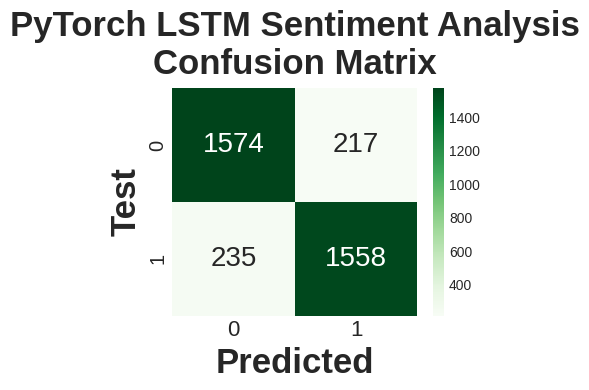

In [ ]:
perf_matrix(y_test_list, y_pred_list)
conf_matrix(y_test_list,y_pred_list,'PyTorch LSTM Sentiment Analysis\nConfusion Matrix', label)

## PyTorch BiLSTM modeling

In [ ]:
NUM_CLASSES = 2 #We are dealing with a multiclass classification of 2 classes
BIDIRECTIONAL = True #Boolean value to choose if to use a bidirectional LSTM or not

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class BiLSTM_Sentiment_Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional,batch_size, dropout):
        super(BiLSTM_Sentiment_Classifier,self).__init__()
        
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size
        

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            dropout=dropout,
                            bidirectional=bidirectional,
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim*self.num_directions, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        self.batch_size = x.size(0)
        ##EMBEDDING LAYER
        embedded = self.embedding(x)
        #LSTM LAYERS
        out, hidden = self.lstm(embedded, hidden)
        #Extract only the hidden state from the last LSTM cell
        out = out[:,-1,:]
        #FULLY CONNECTED LAYERS
        out = self.fc(out)
        out = self.softmax(out)

        return out, hidden

    def init_hidden(self, batch_size):
        #Initialization of the LSTM hidden and cell states
        h0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        c0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        hidden = (h0, c0)
        return hidden

In [ ]:
model = BiLSTM_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM,NUM_CLASSES, LSTM_LAYERS,BIDIRECTIONAL, BATCH_SIZE, DROPOUT)
model = model.to(DEVICE)

#Initialize embedding with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
#Allow the embedding matrix to be fined tuned to better adapt to out dataset and get higher accuracy
model.embedding.weight.requires_grad=True

print(model)

BiLSTM_Sentiment_Classifier(
  (embedding): Embedding(63367, 200)
  (lstm): LSTM(200, 64, num_layers=3, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay = WEIGHT_DECAY)

### BiLSTM Training loop 

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 1
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0

for e in range(EPOCHS):

    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    ####TRAINING LOOP####

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE) #load features and targets in device

        h = model.init_hidden(labels.size(0))

        model.zero_grad() #reset gradients 

        output, h = model(inputs,h) #get output and hidden states from LSTM network
        
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    ####VALIDATION LOOP####
    
    with torch.no_grad():
        
        model.eval()
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

Epoch 1:Validation accuracy increased (0.000000 --> 87.855114).  Saving model ...
	Train_loss : 0.3923 Val_loss : 0.3220
	Train_acc : 83.770% Val_acc : 87.855%
Epoch 2:Validation accuracy did not increase
	Train_loss : 0.1916 Val_loss : 0.3523
	Train_acc : 93.479% Val_acc : 87.784%
Epoch 3:Validation accuracy did not increase
Early stopped at epoch : 3


In [ ]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

### BiLSTM Testing

In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    y_pred_test = torch.argmax(output, dim=1)
    y_pred_list.extend(y_pred_test.squeeze().tolist())
    y_test_list.extend(labels.squeeze().tolist())

In [ ]:
label = ['0','1']

In [ ]:
print('Classification Report for Bi-LSTM :\n', classification_report(y_test_list, y_pred_list, target_names=label))

Classification Report for Bi-LSTM :
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      1791
           1       0.87      0.86      0.87      1793

    accuracy                           0.87      3584
   macro avg       0.87      0.87      0.87      3584
weighted avg       0.87      0.87      0.87      3584



Accuracy: 0.8671875
Precision: 0.867210491572968
Recall: 0.8671875
F1 Score: 0.8671857629308788


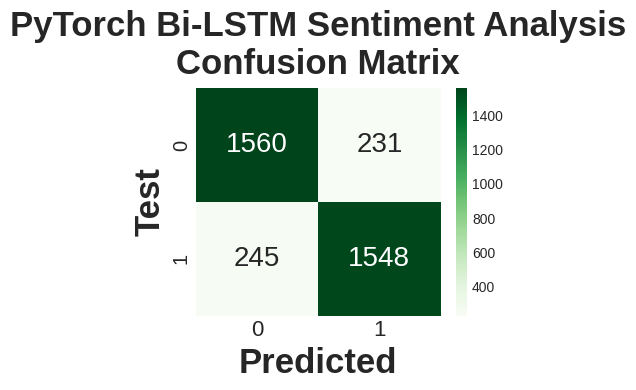

In [ ]:
perf_matrix(y_test_list, y_pred_list)
conf_matrix(y_test_list,y_pred_list,'PyTorch Bi-LSTM Sentiment Analysis\nConfusion Matrix', label)